In [56]:
# Import delle librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stile
sns.set(style="whitegrid")

In [57]:
# Caricamento del dataset
df = pd.read_csv("california_housing_data.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
# Info dataset
df.info()

# Statistiche descrittive
stats = df.describe().T
stats["median"] = df.median(numeric_only=True)
stats[["mean", "median", "std", "min", "max"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,mean,median,std,min,max
MedInc,3.870671,3.534800,1.899822,0.499900,15.000100
HouseAge,28.639486,29.000000,12.585558,1.000000,52.000000
AveRooms,5.429000,5.229129,2.474173,0.846154,141.909091
AveBedrms,1.096675,1.048780,0.473911,0.333333,34.066667
Population,1425.476744,1166.000000,1132.462122,3.000000,35682.000000
AveOccup,3.070655,2.818116,10.386050,0.692308,1243.333333
Latitude,35.631861,34.260000,2.135952,32.540000,41.950000
Longitude,-119.569704,-118.490000,2.003532,-124.350000,-114.310000
MedHouseVal,2.068558,1.797000,1.153956,0.149990,5.000010


ISTOGRAMMI — Distribuzione delle variabili

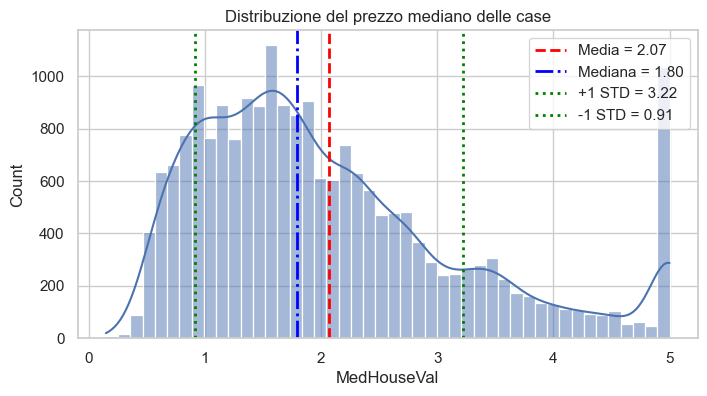

In [59]:
# Istogramma di MedHouseVal -> distribuzione del prezzo delle case
plt.figure(figsize=(8,4))
sns.histplot(df["MedHouseVal"], kde=True)

mean = df["MedHouseVal"].mean()
median = df["MedHouseVal"].median()
std = df["MedHouseVal"].std()

plt.axvline(mean, color="red", linestyle="--", linewidth=2, label=f"Media = {mean:.2f}")
plt.axvline(median, color="blue", linestyle="-.", linewidth=2, label=f"Mediana = {median:.2f}")
plt.axvline(mean + std, color="green", linestyle=":", linewidth=2, label=f"+1 STD = {mean+std:.2f}")
plt.axvline(mean - std, color="green", linestyle=":", linewidth=2, label=f"-1 STD = {mean-std:.2f}")

plt.title("Distribuzione del prezzo mediano delle case")
plt.legend()
plt.show() # Asimmetrico -> case molto costose ma rare (tranne quelle supercostose)

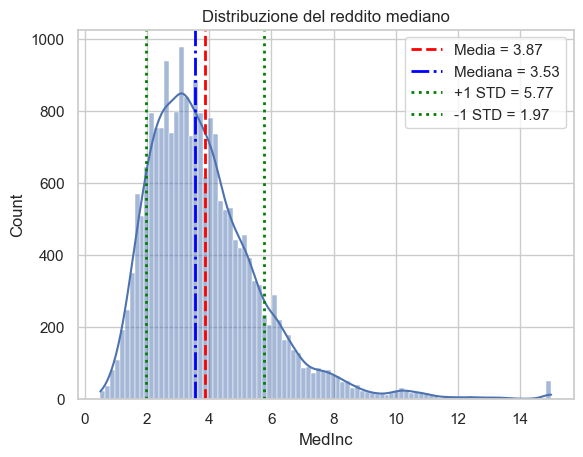

In [60]:
# Distribuzione di MedInc (reddito mediano) -> come si distribuiscono i redditi
sns.histplot(df["MedInc"], kde=True)

mean = df["MedInc"].mean()
median = df["MedInc"].median()
std = df["MedInc"].std()

plt.axvline(mean, color="red", linestyle="--", linewidth=2, label=f"Media = {mean:.2f}")
plt.axvline(median, color="blue", linestyle="-.", linewidth=2, label=f"Mediana = {median:.2f}")
plt.axvline(mean + std, color="green", linestyle=":", linewidth=2, label=f"+1 STD = {mean+std:.2f}")
plt.axvline(mean - std, color="green", linestyle=":", linewidth=2, label=f"-1 STD = {mean-std:.2f}")

plt.title("Distribuzione del reddito mediano")
plt.legend()
plt.show() # Skewed: la maggior parte delle famiglie ha redditi medi/bassi e pochi hanno redditi alti

SCATTER PLOT – Relazioni tra variabili

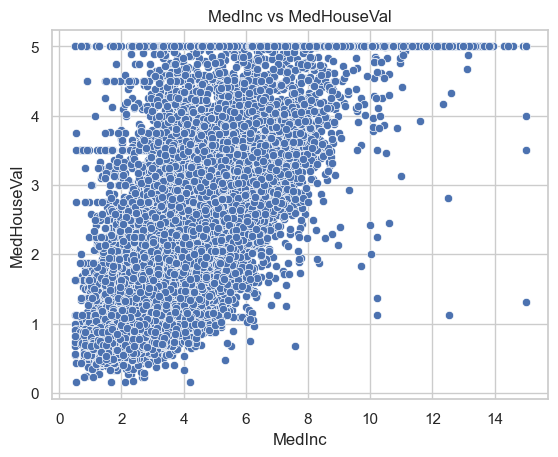

In [61]:
# Reddito vs Valore delle case
sns.scatterplot(data=df, x="MedInc", y="MedHouseVal")
# x: reddito mediano (MedInc)
# y: prezzo delle case (MedHouseVal)

plt.title("MedInc vs MedHouseVal")

plt.show() # Correlazione positiva: zone con reddito più alto -> case più costose.

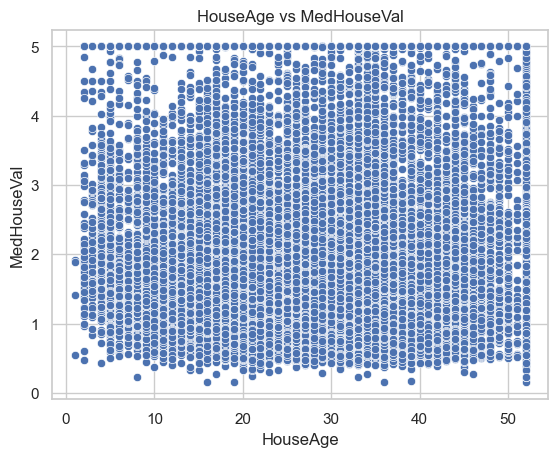

In [62]:
# Età delle case vs prezzo
sns.scatterplot(data=df, x="HouseAge", y="MedHouseVal")
plt.title("HouseAge vs MedHouseVal")

plt.show() # Punti sparsi senza pattern -> non esiste correlazione forte -> case più vecchie non sono per forza più economiche

MATRICE DI CORRELAZIONE

La correlazione va da -1 a +1:
- +1 : relazione lineare perfetta
- 0 : assenza di relazione lineare
- -1 : relazione inversa perfetta

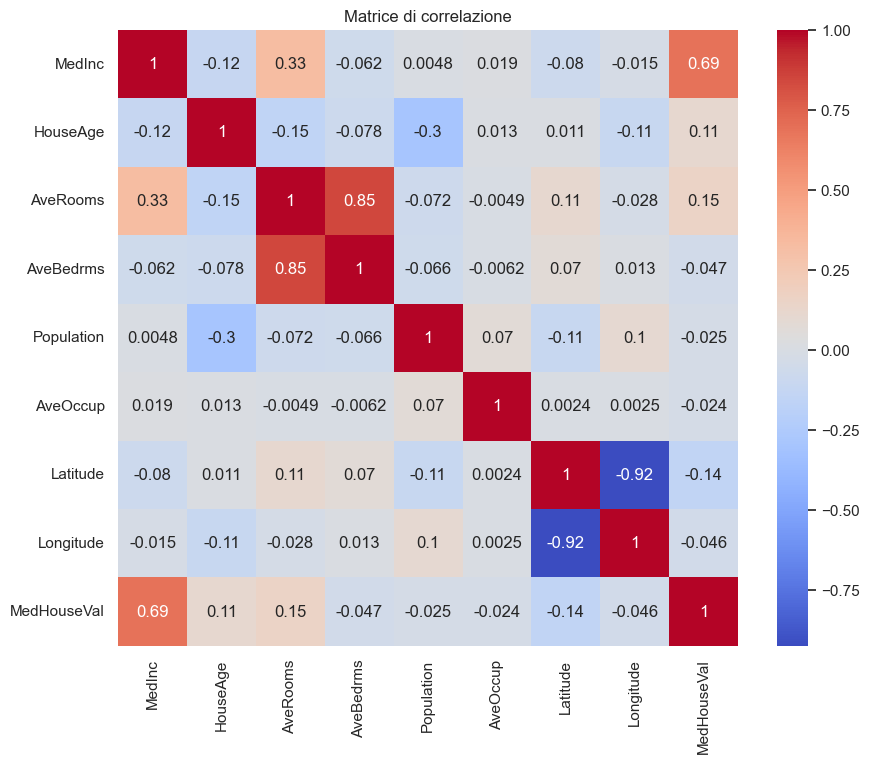

In [63]:
# Calcolo
corr = df.corr(numeric_only=True)
corr

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice di correlazione")

plt.show()
# MedInc è molto correlato a MedHouseVal (forte segno +)
# AveBedrms cresce fortemente con AveRooms
# Latitude/Longitude -> gradienti geografici

SCATTER GEOGRAFICO

- Ogni punto è una zona geografica
- Colorazione: valore delle case

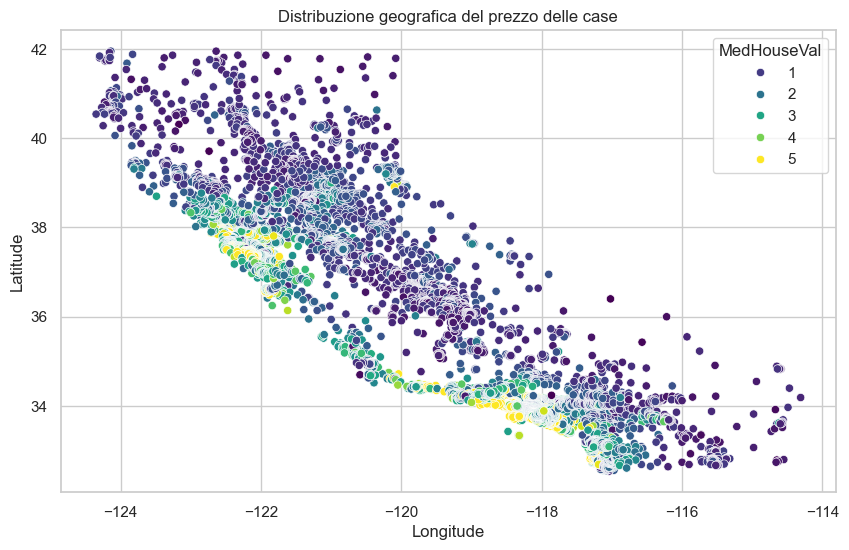

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["MedHouseVal"], palette="viridis")
plt.title("Distribuzione geografica del prezzo delle case")

plt.show()
# Quella che vedo è la mappa della California, e vedo che:
# - Costa (San Francisco, LA) -> valori alti
# - Interno -> valori bassi.